In [160]:
import camelot
import pandas as pd
import json
from functools import reduce
import matplotlib.pyplot as plt
#https://matplotlib.org/3.1.0/users/dflt_style_changes.html colors

In [ ]:
def get_data(tables):
    data_frames = []
    for i in range(len(tables)):
        data_frames.append(tables[i].df)
    return data_frames        

In [ ]:
data_frames = get_data(camelot.read_pdf('edital.pdf', pages='1-54', flavor='lattice', strip_text='\n'))

In [312]:
df = reduce(lambda left,right: pd.merge(left,right,on=[0,1,2,3,4],how='outer'), data_frames)
df.drop(0, inplace=True)
df.rename(columns={
    0:'Estudante', 1:'Unidade', 2:'Título do Trabalho', 
    3:'Programa', 4:'Data da apresentação'},inplace=True)

In [313]:
with open('docs/total.json','w', encoding='utf-8') as file: file.write(json.dumps(df.to_dict(), ensure_ascii=False, indent=4))        
df.to_excel('docs/total.xlsx', sheet_name='Sheet1', index=False)

In [314]:
df

,Estudante,Unidade,Título do Trabalho,Programa,Data da apresentação
1,ABEL PEREIRA LIMA SOARES,CPCS,CARACTERÍSTICAS FÍSICAS DO SOLO DESEMPENHO AGR...,PIBIC,25/07/2019
2,ABEL PEREIRA LIMA SOARES,CPCS,DESEMPENHO AGRONÔMICO DE CULTIVARES DE SOJA CO...,PIBIC,26/07/2019
3,ADALGISA APARECIDA DE OLIVEIRA,FAALC,PRÁTICAS DE ESCRITA EM LÍNGUA PORTUGUESA POR A...,PPG,23/07/2019
4,ADÃO CAETANO DE DEUS FILHO,CPAQ,UMA REVISÃO SOBRE O ACENTO NA LÍNGUA TERENA,PIVIC,22/07/2019
5,ADAUTO FERREIRA DE SOUZA NETO,FAENG,ACESSIBILIDADE E INCLUSÃO: TECNOLOGIAS DE MOBI...,PIBIC,26/07/2019
6,ADELSON DOURADO CAVALCANTE,CPCX,A OBRA DE HENRIQUE SPENGLER: DIÁLOGOS COM A CU...,ENEX,22/07/2019
7,ADILSON CORREA DA SILVA JUNIOR,CPAN,BENEFICIOS DOS JOGOS MATEMÁTICOS PARA FORMAÇÃO...,PIBID,25/07/2019
8,ADOLPHO NILSON PRADO,CPNV,ADMINTERAÇÃO,ENEX,22/07/2019
9,ÁDRIA SAVIANO FABRICIO DA SILVA,FADIR,A DEFESA DA DEMOCRACIA COMO JUSTIFICATIVA PARA...,PIBIC,23/07/2019
10,ADRIANA FERREIRA MODESTO DE OLIVEIRA,INISA,"INTER-RELAÇÃO ENTRE FRAGILIDADE, SARCOPENIA, F...",PIBIC,24/07/2019


In [315]:
df.groupby(['Unidade']).groups.keys()

dict_keys(['CPAN', 'CPAQ', 'CPAR', 'CPCS', 'CPCX', 'CPNA', 'CPNV', 'CPPP', 'CPTL', 'ESAN', 'FAALC', 'FAAÇC', 'FACFAN', 'FACH', 'FACOM', 'FADIR', 'FAED', 'FAENG', 'FAMED', 'FAMEZ', 'FAODO', 'INBIO', 'INFI', 'INISA', 'INMA', 'INQUI', 'NHU', 'PROECE'])

In [316]:
len(df.groupby(['Unidade']).groups['CPPP'])

23

In [317]:
df.groupby(['Unidade']).count().reset_index().sort_values(by='Estudante',ascending=False)

,Unidade,Estudante,Título do Trabalho,Programa,Data da apresentação
8,CPTL,162,162,162,162
0,CPAN,95,95,95,95
17,FAENG,79,79,79,79
12,FACFAN,72,72,72,72
23,INISA,66,66,66,66
10,FAALC,64,64,64,64
19,FAMEZ,57,57,57,57
1,CPAQ,57,57,57,57
21,INBIO,56,56,56,56
3,CPCS,50,50,50,50


# **Quantidade de apresentações por campus**

In [318]:
ordenado = df.groupby(['Unidade']).count().reset_index().sort_values(by='Estudante',ascending=False)[['Unidade','Estudante']].reset_index().drop('index',axis=1)

In [319]:
qtd_unidade = ordenado.rename(columns={'Estudante':'Quantidade'}).set_index('Unidade')

In [320]:
# qtd_unidade.set_index('Unidade',inplace=True)

In [321]:
qtd_unidade

,Quantidade
Unidade,
CPTL,162
CPAN,95
FAENG,79
FACFAN,72
INISA,66
FAALC,64
FAMEZ,57
CPAQ,57
INBIO,56


In [322]:
# qtd_excel.reset_index() voltar para o q era antes

In [323]:
qtd_unidade.to_excel('docs/qtd_unidade.xlsx')

In [385]:
#https://matplotlib.org/2.0.0/examples/color/named_colors.html
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'khaki','b','teal','#99ff99','#ffcc99', '#52BE80', '#F7DC6F', '#6C3483', 'crimson', 'darkturquoise', '#4A235A', '#F39C12', 'green', 'hotpink', '#800000', '#FFFF00', '#00FF00', '#FF00FF', '#0000FF', '#FF9999', 'red', '#800080', '#CD5C5C', '#E59866', '#1F618D', '#6E2C00', '#17202A', '#85C1E9', '#F1948A']
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'khaki']

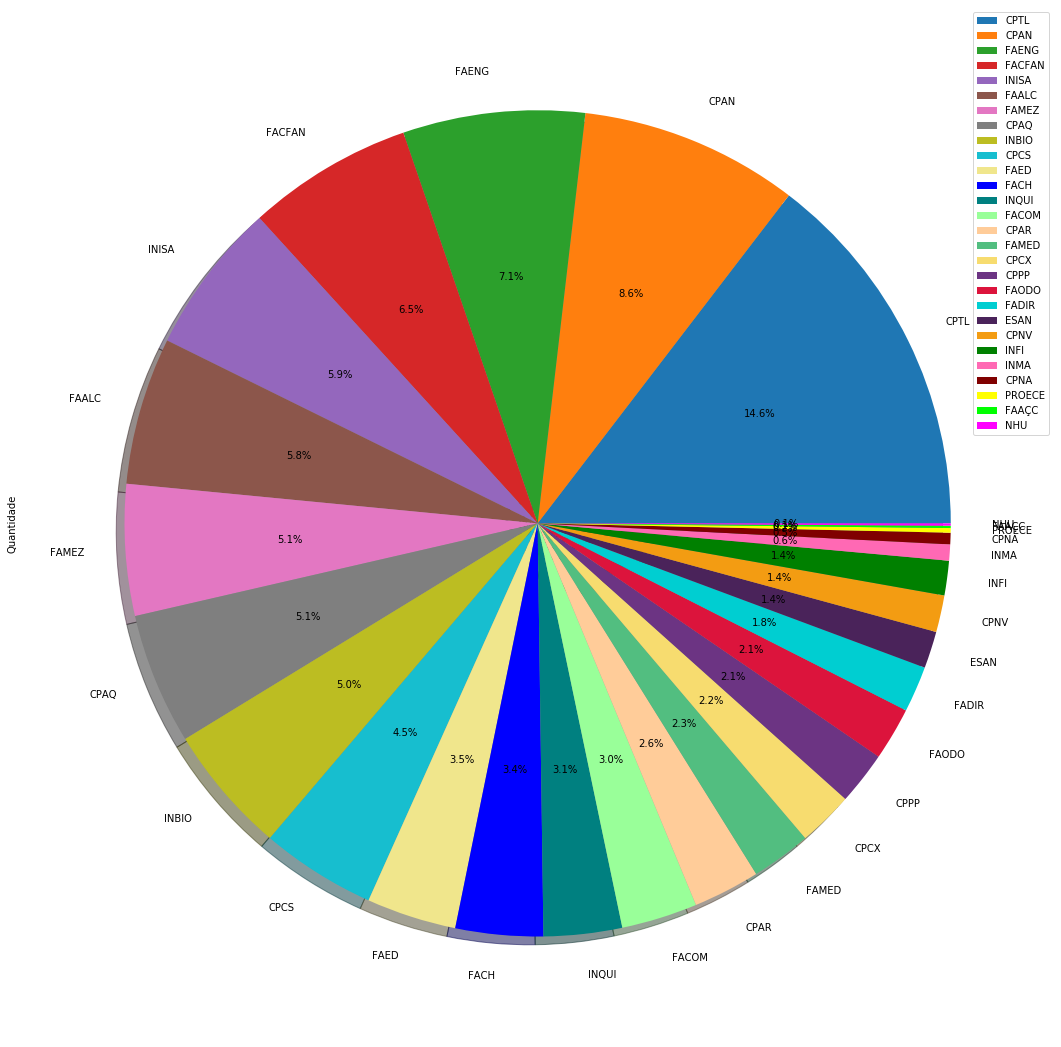

In [386]:
unidade_pie = qtd_unidade.plot.pie(y='Quantidade',figsize=(19, 19), shadow=True, autopct='%1.1f%%', colors=colors)

In [387]:
unidade_pie_fig = unidade_pie.get_figure().savefig('img/unidade_pie.pdf')

In [388]:
unidade_pie_fig

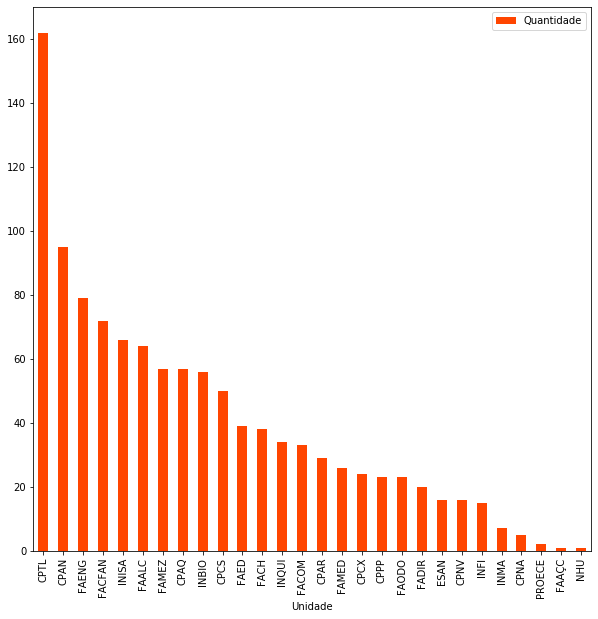

In [389]:
# ax = qtd_unidade.plot(color='teal',figsize=(10,10), label='Quantidade', legend=False)
# unidade_bar = qtd_unidade.plot(color='teal',figsize=(10,10), label='Quantidade', kind='bar', ax=ax)
unidade_bar = qtd_unidade.plot.bar(color='orangered',figsize=(10,10), label='Quantidade')

In [390]:
for p in unidade_bar.patches: unidade_bar.annotate('{}'.format(str(p.get_height())), (p.get_x(), p.get_height()))

In [391]:
unidade_bar_fig = unidade_bar.get_figure().savefig('img/unidade_bar.pdf')

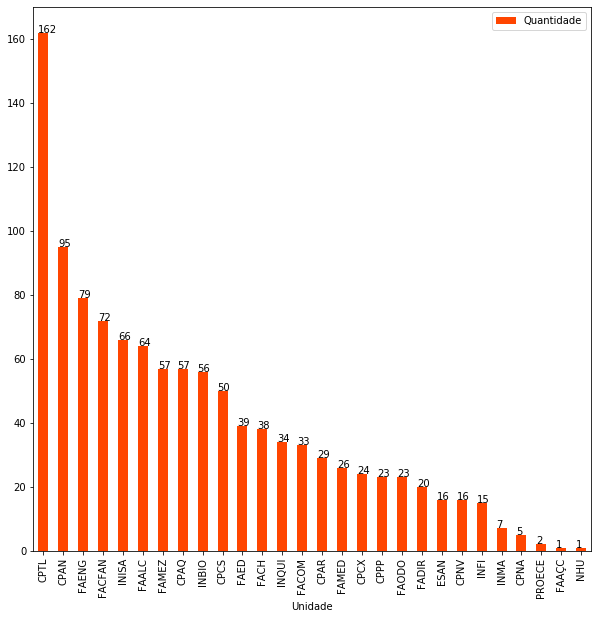

In [392]:
unidade_bar.get_figure()

# **Quantidade por programa**

In [332]:
ordenado = df.groupby(['Programa']).count().reset_index().sort_values(by='Estudante',ascending=False)[['Programa','Estudante']].reset_index().drop('index',axis=1)

In [333]:
qtd_programa = ordenado.rename(columns={'Estudante':'Quantidade'}).set_index('Programa')

In [334]:
qtd_programa

,Quantidade
Programa,
PIBIC,463
PIVIC,200
ENEX,114
PPG,84
PAEXT,71
PET,55
PIBID,39
RP,23
PEG,17


In [335]:
qtd_programa.to_excel('docs/qtd_programa.xlsx')

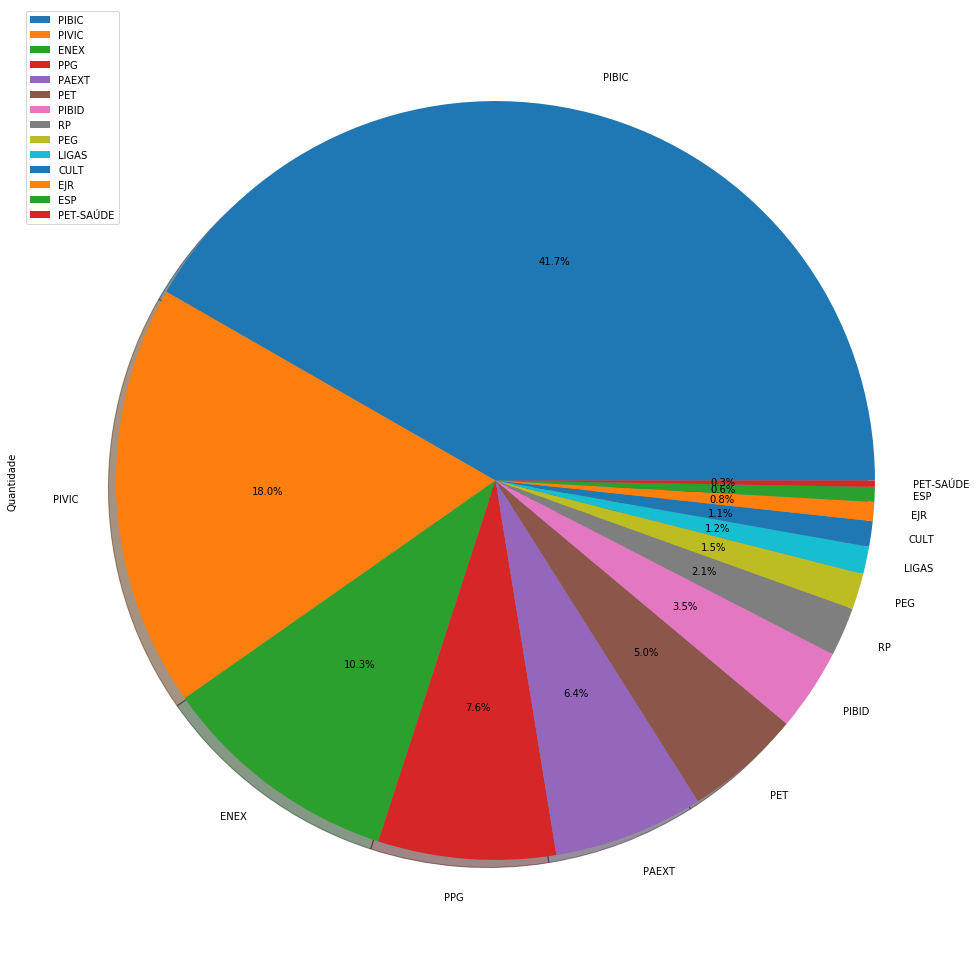

In [336]:
programa_pie = qtd_programa.plot.pie(y='Quantidade',figsize=(17, 20), shadow=True, autopct='%1.1f%%')

In [337]:
programa_pie_fig = programa_pie.get_figure()

In [338]:
programa_pie_fig.savefig('img/programa_pie.pdf')

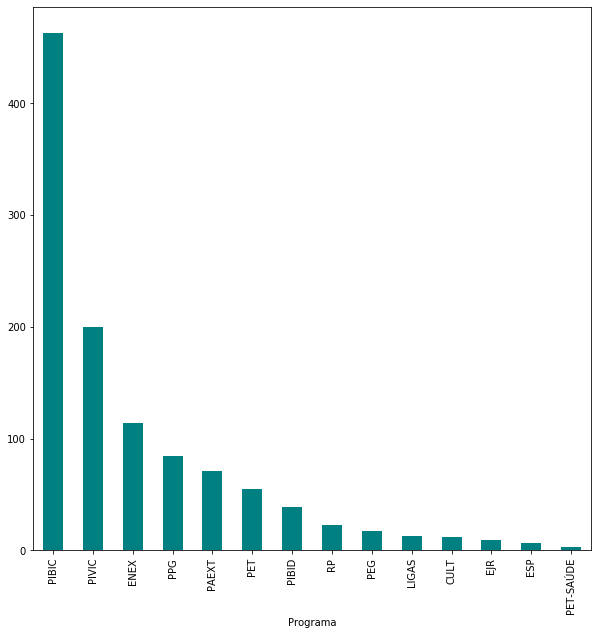

In [339]:
#ax = qtd_programa.plot(color='teal',figsize=(10,10), label='Quantidade', legend=False)
programa_bar = qtd_programa.plot(color='teal',figsize=(10,10), label='Quantidade', kind='bar', legend=False)

In [340]:
for p in programa_bar.patches: programa_bar.annotate('{}'.format(str(p.get_height())), (p.get_x(), p.get_height()))

In [341]:
programa_bar_fig = programa_bar.get_figure()

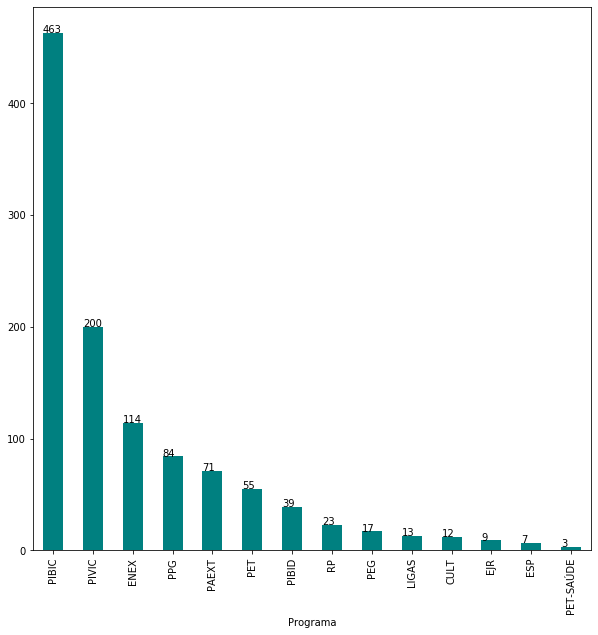

In [342]:
programa_bar_fig

In [343]:
programa_bar_fig.savefig('img/programa_bar.pdf')

# **Quantidade de apresentacoes que cada programa lançou em cada unidade**

In [344]:
ordenado_unidade = df.groupby(['Programa','Unidade']).count().reset_index().sort_values(by='Unidade',ascending=True)[['Programa','Unidade','Estudante']].reset_index().drop('index',axis=1)

In [345]:
qtd_proguni_unid = ordenado_unidade.rename(columns={'Estudante':'Quantidade'}).set_index('Unidade')

In [346]:
#qtd_proguni_unid.loc['CPPP']['Quantidade'].sum()

In [347]:
#qtd_proguni_unid.loc['CPPP'][['Programa','Quantidade']]

In [348]:
qtd_proguni_unid

,Programa,Quantidade
Unidade,,
CPAN,CULT,2
CPAN,PAEXT,4
CPAN,PEG,2
CPAN,PET,4
CPAN,ENEX,16
CPAN,PIBIC,22
CPAN,PIBID,7
CPAN,PIVIC,7
CPAN,ESP,3


In [349]:
qtd_proguni_unid.to_excel('docs/qtd_proguni_unid.xlsx')

In [350]:
ordenado_prog = df.groupby(['Programa','Unidade']).count().reset_index().sort_values(by='Programa',ascending=True)[['Programa','Unidade','Estudante']].reset_index().drop('index',axis=1)

In [351]:
qtd_proguni_prog = ordenado_prog.rename(columns={'Estudante':'Quantidade'}).set_index('Programa')

In [352]:
#qtd_proguni_prog.loc['CPPP']['Quantidade'].sum()

In [353]:
#qtd_proguni_prog.loc['CPPP'][['Programa','Quantidade']]

In [354]:
qtd_proguni_prog

,Unidade,Quantidade
Programa,,
CULT,CPAN,2
CULT,CPAQ,1
CULT,CPAR,2
CULT,CPNA,1
CULT,CPTL,1
CULT,FAALC,4
CULT,FAED,1
EJR,FAMEZ,1
EJR,FAENG,2


In [355]:
qtd_proguni_prog.to_excel('docs/qtd_proguni_prog.xlsx')

In [356]:
dfs = {'Ordenado por Unidade':qtd_proguni_unid, 'Ordenado por Programa':qtd_proguni_prog}

In [357]:
dfs

{'Ordenado por Unidade':         Programa  Quantidade
 Unidade                     
 CPAN        CULT           2
 CPAN       PAEXT           4
 CPAN         PEG           2
 CPAN         PET           4
 CPAN        ENEX          16
 CPAN       PIBIC          22
 CPAN       PIBID           7
 CPAN       PIVIC           7
 CPAN         ESP           3
 CPAN          RP           6
 CPAN         EJR           1
 CPAN         PPG          21
 CPAQ          RP           5
 CPAQ        CULT           1
 CPAQ       PAEXT           7
 CPAQ         PEG           1
 CPAQ       PIBIC          19
 CPAQ       PIVIC          15
 CPAQ       PIBID           8
 CPAQ        ENEX           1
 CPAR       PIVIC           2
 CPAR         PPG           1
 CPAR         PEG           3
 CPAR       LIGAS           1
 CPAR       PIBIC           8
 CPAR       PAEXT           2
 CPAR       PIBID           1
 CPAR          RP           1
 CPAR        CULT           2
 CPAR        ENEX           8
 ...          ..

In [358]:
writer = pd.ExcelWriter('docs/prog_unid.xlsx', engine='xlsxwriter')
for sheet_name in dfs.keys(): dfs[sheet_name].to_excel(writer, sheet_name=sheet_name, index=True)
writer.save()

# **Alunos que submeteram mais de um trabalho**

In [359]:
x = df.groupby(['Estudante','Unidade']).count().reset_index()[['Estudante','Unidade','Data da apresentação']].reset_index().sort_values(by='Estudante',ascending=True).drop('index',axis=1)

In [360]:
estudante = x.rename(columns={'Data da apresentação':'Quantidade'})

In [361]:
aluno_excel = estudante[estudante['Quantidade']>1].reset_index().drop('index',axis=1)

In [362]:
aluno_excel

,Estudante,Unidade,Quantidade
0,ABEL PEREIRA LIMA SOARES,CPCS,2
1,ALEXSANDRA NOGUEIRA MARTINS SILVA,CPCS,2
2,AMANDA ALVES REZENDE,FAMED,2
3,AMANY HATAE CAMPOVILLE,CPTL,2
4,ANA BEATRIZ SILVA BRANDÃO DE SOUZA,FAALC,2
5,BÁRBARA ARTUZO SIMABUCO,FAALC,2
6,CARLOS EDUARDO DOS SANTOS NASCIMENTO,INISA,2
7,DANIELLE DOS SANTOS BARRETO,FAED,2
8,EDER DE ARRUDA INSAURALDE,CPAQ,2
9,FERNANDO RIBEIRO DOS SANTOS,CPTL,2


In [363]:
aluno_excel.to_excel('docs/qtd_aluno.xlsx',index=False)

# **Quantidade de apresentacoes em cada dia**

In [364]:
x = df.groupby(['Data da apresentação']).count().reset_index()[['Data da apresentação','Estudante']].reset_index().sort_values(by='Data da apresentação',ascending=True).drop('index',axis=1)

In [365]:
apresentacao = x.rename(columns={'Estudante':'Quantidade'}).set_index('Data da apresentação')

In [366]:
apresentacao

,Quantidade
Data da apresentação,
22/07/2019,243
23/07/2019,245
24/07/2019,244
25/07/2019,192
26/07/2019,186


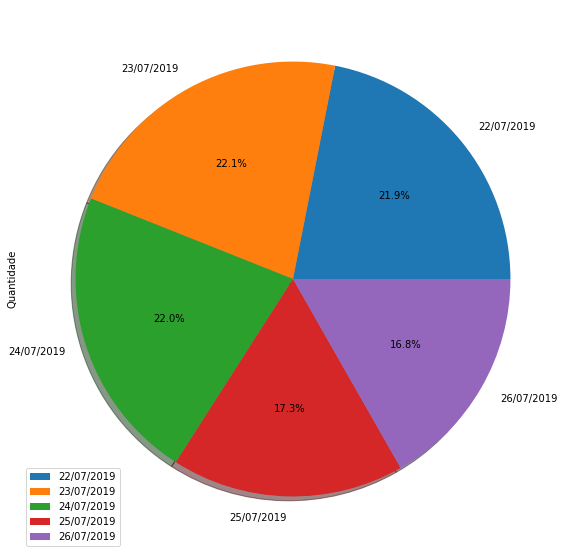

In [396]:
apresentacao_pie = apresentacao.plot.pie(y='Quantidade',figsize=(10, 10), shadow=True, autopct='%1.1f%%',colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

In [368]:
apresentacao_pie_bar = apresentacao_pie.get_figure()

In [369]:
apresentacao_pie_bar.savefig('img/apresentacao_pie.pdf')

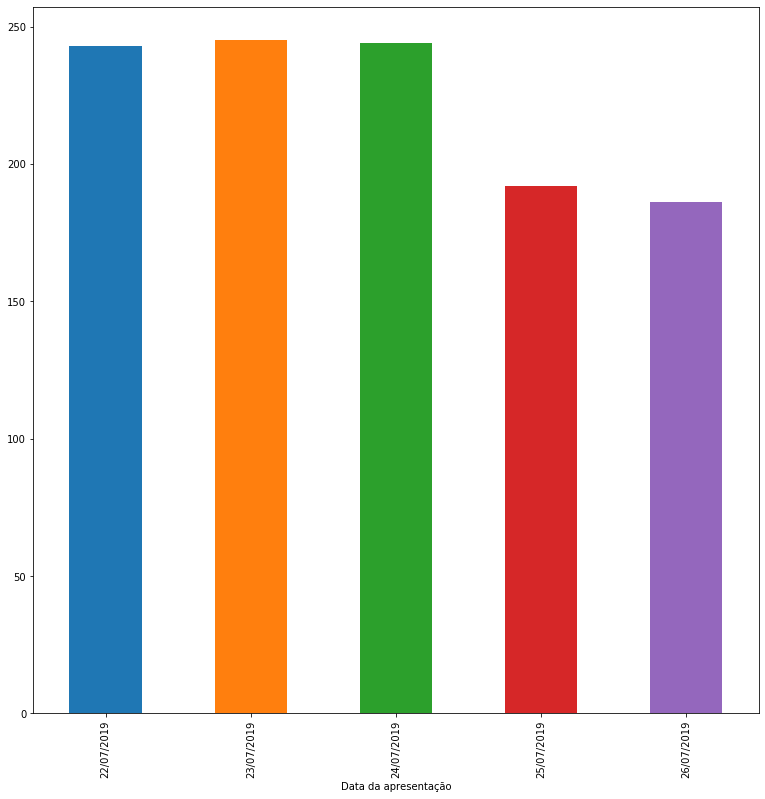

In [395]:
#'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'
#apresentacao_bar = apresentacao.plot(color='m',figsize=(10,10), kind='bar', legend=False)
apresentacao_bar = apresentacao.plot.bar(y='Quantidade',figsize=(13,13), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], legend=False)

In [371]:
for p in apresentacao_bar.patches: apresentacao_bar.annotate('{}'.format(str(p.get_height())), (p.get_x(), p.get_height()))

In [372]:
apresentacao_bar_fig = apresentacao_bar.get_figure()

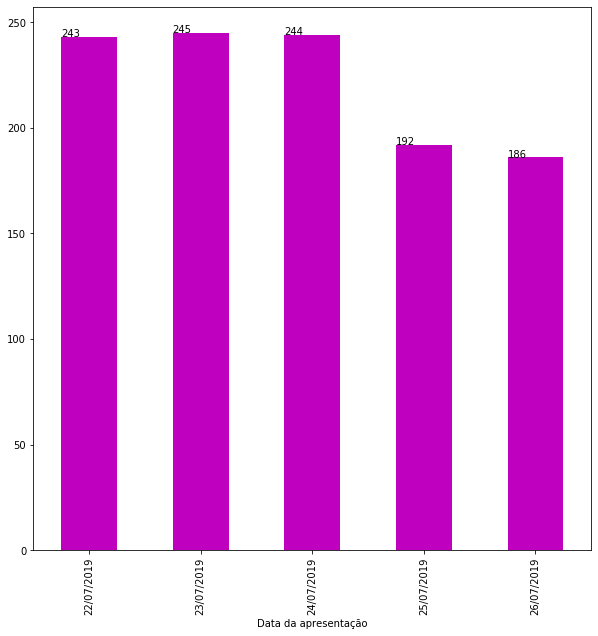

In [373]:
apresentacao_bar_fig

In [374]:
apresentacao_bar_fig.savefig('img/apresentacao_bar.pdf')

# **Submissoes do PET por Campus**

In [375]:
x = df.groupby(['Programa','Unidade']).count().reset_index()[['Programa','Unidade','Estudante']].reset_index().sort_values(by='index',ascending=True).drop('index',axis=1)

In [376]:
pet = x.rename(columns={'Estudante':'Quantidade'}).set_index('Programa')

In [377]:
pets = pet.loc[['PET']]

In [378]:
pets = pets.sort_values('Quantidade', ascending=False)

In [379]:
pets = pets.set_index('Unidade')

In [393]:
pets

,Quantidade
Unidade,
CPTL,17
CPCS,6
CPPP,6
FACOM,6
CPAN,4
FAENG,4
FAMEZ,4
FACFAN,3
INFI,2


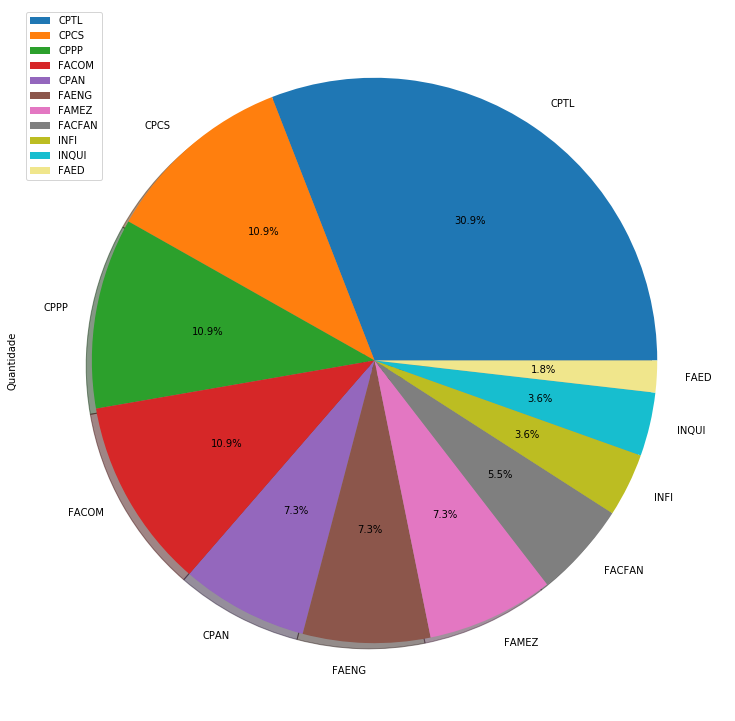

In [380]:
pets_pie = pets.plot.pie(y='Quantidade',figsize=(13, 13), shadow=True, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'khaki'])

In [381]:
pets_pie.get_figure().savefig('img/pets_pie.pdf')

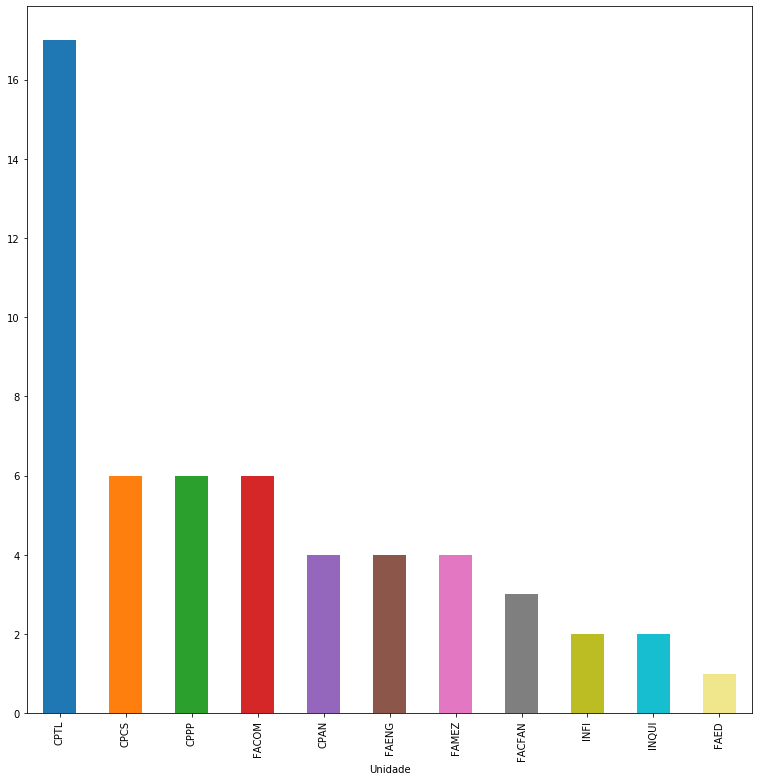

In [382]:
pets_bar = pets.plot.bar(y='Quantidade',figsize=(13, 13), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'khaki'], legend=False)

In [383]:
for p in pets_bar.patches: pets_bar.annotate('{}'.format(str(p.get_height())), (p.get_x(), p.get_height()))

In [384]:
pets_bar.get_figure().savefig('img/pets_bar.pdf')